In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#height is cms

x = np.array([[151],[174],[138],[186],[128],[136],[179],[163],[152],[131]])

#weight in kg 
y = np.array([63,81,56,91,47,57,76,72,62,48])

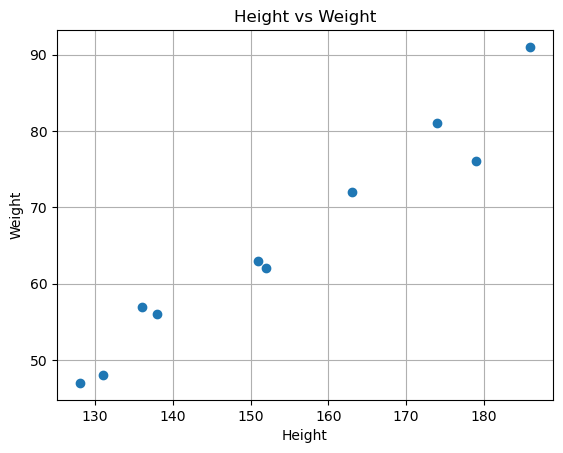

In [9]:
plt.title("Height vs Weight")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.grid()
plt.scatter(x,y)

In [10]:
#import the class 

from sklearn.linear_model import LinearRegression

#create the object
regressor =  LinearRegression()


In [12]:
#train the algorithm      ie.finding the value of m and c.         #line eq y=mx+c

regressor.fit(x,y)

LinearRegression()

In [13]:

#value of c
regressor.intercept_


-38.45508707607698

In [14]:
#value of m
regressor.coef_

array([0.67461045])

In [15]:

#height*m-c=weight of a person             (whose Height is -180cm)

180*0.67461045-38.45508707607698

82.97479392392302

In [16]:
#heigth*m-c=weight of a person             (whose Height is -150cm)

150*0.67461045-38.45508707607698

62.73648042392301

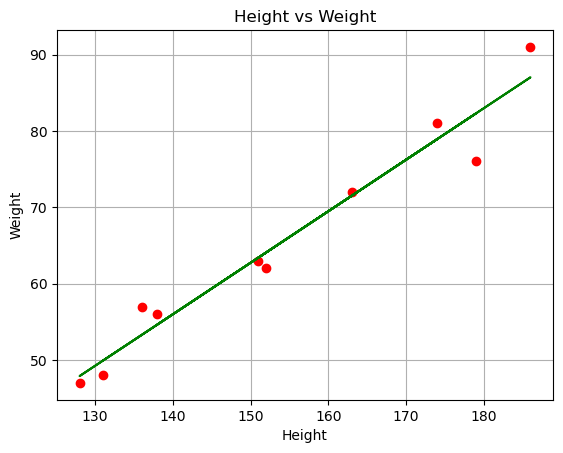

In [17]:
y_new =x*0.67461045-38.45508707607698

plt.title("Height vs Weight")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.grid()
plt.scatter(x,y,color ="red")
plt.plot(x,y_new,color ="green")

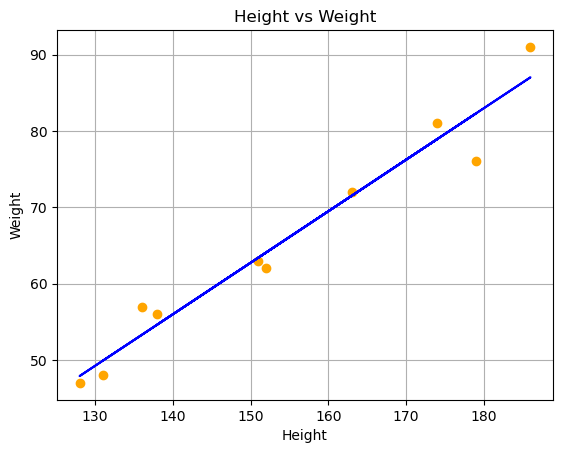

In [18]:
y_new =x*0.67461045-38.45508707607698

plt.title("Height vs Weight")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.grid()
plt.scatter(x,y,color ="orange")
plt.plot(x,y_new,color ="blue")

In [19]:
import pandas as pd

In [20]:
result = pd.DataFrame({
    "actual":y,
    "predicted":y_new.flatten()
})
result

,actual,predicted
0,63,63.411091
1,81,78.927131
2,56,54.641155
3,91,87.022457
4,47,47.895051
5,57,53.291934
6,76,82.300183
7,72,71.506416
8,62,64.085701
9,48,49.918882


In [5]:
#Salary_Data ,mtcars.csv

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
df= pd.read_csv("datasets/Salary_Data.csv")

In [8]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


##### Separate the input and output variable

In [38]:
x = df [["YearsExperience"]]       #input is in 2D

y =  df ["Salary"]                 #output is always 1D

In [11]:
x.shape

(30, 1)

In [12]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


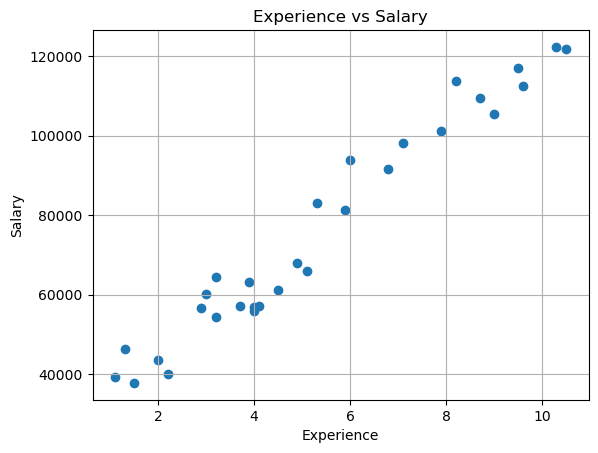

In [13]:
plt.title("Experience vs Salary")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.grid()
plt.scatter(x,y)


##### Cross Validation Method

In [14]:
#import the function

from sklearn.model_selection import train_test_split

#split the data in training (75%) and testing(25%)

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)


In [15]:
x_train.shape

(22, 1)

In [16]:
x_test.shape

(8, 1)

In [18]:
y_train.shape,y_test.shape

((22,), (8,))

In [19]:
x_train

,YearsExperience
17,5.3
22,7.9
5,2.9
16,5.1
8,3.2
14,4.5
23,8.2
20,6.8
1,1.3
29,10.5


In [21]:
x_test

,YearsExperience
2,1.5
28,10.3
13,4.1
10,3.9
26,9.5
24,8.7
27,9.6
11,4.0


##### Build the Model

In [22]:
from sklearn.linear_model import LinearRegression

#create the object
regressor =  LinearRegression()


In [23]:
regressor.fit(x_train, y_train)

LinearRegression()

In [24]:
regressor.coef_ ,regressor.intercept_         #values of m and c

(array([9379.71049195]), 26986.691316737248)

In [25]:
#finding the salary of having the experience 12 yrs.

regressor.predict([[12]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([139543.21722009])

In [26]:
regressor.predict([[10]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([120783.7962362])

In [27]:
y_test

2      37731.0
28    122391.0
13     57081.0
10     63218.0
26    116969.0
24    109431.0
27    112635.0
11     55794.0
Name: Salary, dtype: float64

##### Predict on the test data

In [28]:
y_pred = regressor.predict(x_test)

y_pred

array([ 41056.25705466, 123597.70938378,  65443.50433372,  63567.56223533,
       116093.94099022, 108590.17259667, 117031.91203942,  64505.53328452])

In [30]:
result = pd.DataFrame({
    "actual":y_test,                    
    "predicted":y_pred
})

In [32]:
result              #actual and predicted values 

,actual,predicted
2,37731.0,41056.257055
28,122391.0,123597.709384
13,57081.0,65443.504334
10,63218.0,63567.562235
26,116969.0,116093.940990
24,109431.0,108590.172597
27,112635.0,117031.912039
11,55794.0,64505.533285


In [35]:
result = pd.DataFrame({
    "x":x_test["YearsExperience"] ,    #input
    
    "y":y_test,                        #actual output
    
    " y^" : y_pred,                    #predicted output
    
    "Error" :  y_pred-y_test,          #diff between
    
    "abs(error)" :abs( y_pred-y_test)
})

In [36]:
result

,x,y,y^,Error,abs(error)
2,1.5,37731.0,41056.257055,3325.257055,3325.257055
28,10.3,122391.0,123597.709384,1206.709384,1206.709384
13,4.1,57081.0,65443.504334,8362.504334,8362.504334
10,3.9,63218.0,63567.562235,349.562235,349.562235
26,9.5,116969.0,116093.940990,-875.059010,875.059010
24,8.7,109431.0,108590.172597,-840.827403,840.827403
27,9.6,112635.0,117031.912039,4396.912039,4396.912039
11,4.0,55794.0,64505.533285,8711.533285,8711.533285


In [43]:
#Mean abs Error(MAE)

np.mean(abs( y_pred-y_test))

3508.5455930660555

In [42]:
from sklearn.metrics import mean_absolute_error    #pre-dedined function
mean_absolute_error( y_test, y_pred)

3508.5455930660555

In [51]:
#Root Mean Square Error

result = pd.DataFrame({
    "x":x_test["YearsExperience"] ,    #input
    
    "y":y_test,                        #actual output
    
    " y^" : y_pred,                    #predicted output
    
    "Error" :  y_pred-y_test,          #diff between
    
    "Error^2" :( y_pred-y_test)**2     #square of diff bet actual and predicted 
})

In [52]:
result 

,x,y,y^,Error,Error^2
2,1.5,37731.0,41056.257055,3325.257055,1.105733e+07
28,10.3,122391.0,123597.709384,1206.709384,1.456148e+06
13,4.1,57081.0,65443.504334,8362.504334,6.993148e+07
10,3.9,63218.0,63567.562235,349.562235,1.221938e+05
26,9.5,116969.0,116093.940990,-875.059010,7.657283e+05
24,8.7,109431.0,108590.172597,-840.827403,7.069907e+05
27,9.6,112635.0,117031.912039,4396.912039,1.933284e+07
11,4.0,55794.0,64505.533285,8711.533285,7.589081e+07


In [53]:
#RMSE  (root mean suared error )
np.sqrt(np.mean(( y_pred-y_test)**2))

4733.70258289858

In [54]:
from sklearn.metrics import mean_squared_error    #pre-dedined function
np.sqrt(mean_squared_error( y_test, y_pred))

4733.70258289858

##### R-Squared error

In [55]:
mean_val = np.mean(y_test)

In [56]:
mean_val

84406.25

In [58]:
num = np.sum((y_test - mean_val)**2) - np.sum(( y_test-y_pred)**2)

r2 = num/np.sum((y_test - mean_val)**2)

r2

0.9779208335417601

In [62]:
from sklearn.metrics import r2_score    #pre-dedined function
r2_score( y_test, y_pred)

0.9779208335417602

In [65]:
regressor.score( x_test, y_test)

0.9779208335417602

In [66]:
regressor.score( x, y)

0.955975487542377

In [68]:
regressor.score( x_train, y_train)

0.9395413526983522

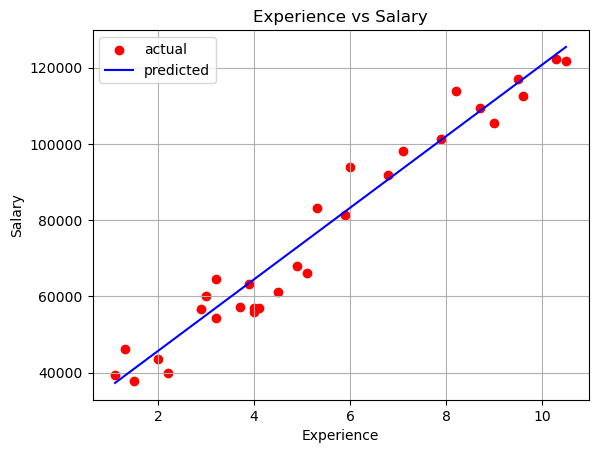

In [69]:
y_pred = regressor.predict(x)

plt.title("Experience vs Salary")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.grid()
plt.scatter(x,y,color = "red", label = "actual")
plt.plot(x,y_pred,color= "blue",label = "predicted")
plt.legend()

In [70]:

y_pred = regressor.predict(x_test)

from sklearn.metrics import mean_absolute_percentage_error    #pre-dedined function to calculate in %
mean_absolute_percentage_error( y_test, y_pred)

0.05754512646779697

In [73]:
exp = float(input("Enter the Experience: "))
exp = pd.DataFrame({"YearsExperience" :[exp]})
sal = regressor.predict(exp)
print("Your Expected Salary Can Be : ",sal[0])

Enter the Experience:  3


Your Expected Salary Can Be :  55125.822792575294
